In [540]:
#importing data
import pandas as pd
df = pd.read_csv('ENDGBV__The_Intersection_of_Domestic_Violence__Race_Ethnicity_and_Sex_20250521 (1).csv')

C:\Users\katri\AppData\Local\Temp\ipykernel_21424\2248697632.py:3: DtypeWarning: Columns (5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ENDGBV__The_Intersection_of_Domestic_Violence__Race_Ethnicity_and_Sex_20250521 (1).csv')


In [541]:
#import seaborn, numpy and matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [542]:
#Preliminary review of data
df.columns

Index(['Offense Type', 'Report Date', 'Incident Precinct Code', 'Borough Name',
       'Intimate Relationship Flag', 'Victim Race', 'Victim Sex',
       'Victim Reported Age', 'Suspect Race', 'Suspect Sex',
       'Suspect Reported Age', 'COMMDIST', 'Poverty', 'Median Income',
       'Unemployment'],
      dtype='object')

In [543]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483790 entries, 0 to 483789
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Offense Type                483790 non-null  object 
 1   Report Date                 483790 non-null  object 
 2   Incident Precinct Code      483790 non-null  int64  
 3   Borough Name                483790 non-null  object 
 4   Intimate Relationship Flag  483790 non-null  object 
 5   Victim Race                 387733 non-null  object 
 6   Victim Sex                  394987 non-null  object 
 7   Victim Reported Age         344524 non-null  float64
 8   Suspect Race                367160 non-null  object 
 9   Suspect Sex                 374345 non-null  object 
 10  Suspect Reported Age        300802 non-null  float64
 11  COMMDIST                    483686 non-null  float64
 12  Poverty                     202325 non-null  float64
 13  Median Income 

In [544]:
print(df.head())

  Offense Type Report Date  Incident Precinct Code Borough Name  \
0          DIR  12/23/2020                       5    MANHATTAN   
1          DIR  01/08/2020                       7    MANHATTAN   
2          DIR  04/05/2020                       5    MANHATTAN   
3          DIR  01/01/2021                      10    MANHATTAN   
4          DIR  01/10/2021                      10    MANHATTAN   

  Intimate Relationship Flag Victim Race Victim Sex  Victim Reported Age  \
0                    MISSING       WHITE     FEMALE                  NaN   
1                        YES       WHITE       MALE                  NaN   
2                    MISSING       WHITE       MALE                  NaN   
3                         NO       WHITE        NaN                  NaN   
4                         NO       WHITE     FEMALE                  NaN   

  Suspect Race Suspect Sex  Suspect Reported Age  COMMDIST  Poverty  \
0        OTHER         NaN                   NaN     103.0      1.0  

In [545]:
#Data Cleaning: Dropping columns that will not be used in my analysis

drop_cols=['Incident Precinct Code', 'Suspect Race','Suspect Sex', 'Suspect Reported Age', 'Victim Reported Age', 'Median Income', 'Unemployment']
df.drop(drop_cols, inplace=True,axis=1)

In [546]:
#Adding ID column
df["ID"] = df.index

In [547]:
#Confirming addition of ID column and dropping of columns that will not be used
df.columns

Index(['Offense Type', 'Report Date', 'Borough Name',
       'Intimate Relationship Flag', 'Victim Race', 'Victim Sex', 'COMMDIST',
       'Poverty', 'ID'],
      dtype='object')

In [548]:
print(df.head())

  Offense Type Report Date Borough Name Intimate Relationship Flag  \
0          DIR  12/23/2020    MANHATTAN                    MISSING   
1          DIR  01/08/2020    MANHATTAN                        YES   
2          DIR  04/05/2020    MANHATTAN                    MISSING   
3          DIR  01/01/2021    MANHATTAN                         NO   
4          DIR  01/10/2021    MANHATTAN                         NO   

  Victim Race Victim Sex  COMMDIST  Poverty  ID  
0       WHITE     FEMALE     103.0      1.0   0  
1       WHITE       MALE     103.0      1.0   1  
2       WHITE       MALE     103.0      1.0   2  
3       WHITE        NaN     104.0      NaN   3  
4       WHITE     FEMALE     104.0      NaN   4  


In [549]:
#Inital Cleaning: Report Date 
df["Report Date"]=pd.to_datetime(df["Report Date"])

date = df["Report Date"]

In [550]:
df['Year']=df['Report Date'].dt.year

In [551]:
df['Month']=df['Report Date'].dt.month

In [552]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483790 entries, 0 to 483789
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Offense Type                483790 non-null  object        
 1   Report Date                 483790 non-null  datetime64[ns]
 2   Borough Name                483790 non-null  object        
 3   Intimate Relationship Flag  483790 non-null  object        
 4   Victim Race                 387733 non-null  object        
 5   Victim Sex                  394987 non-null  object        
 6   COMMDIST                    483686 non-null  float64       
 7   Poverty                     202325 non-null  float64       
 8   ID                          483790 non-null  int64         
 9   Year                        483790 non-null  int32         
 10  Month                       483790 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32

In [553]:
#Exploratroy Analysis: 2020 to 2021
df[["ID", "Year"]].groupby("Year").count().sort_values('ID',ascending=False)

,ID
Year,
2020,242040
2021,241748
2019,2


In [554]:
year_to_remove = 2019
df = df[df['Report Date'].dt.year != year_to_remove]

In [555]:
df[["ID", "Intimate Relationship Flag"]].groupby("Intimate Relationship Flag").count().sort_values('ID',ascending=False)

,ID
Intimate Relationship Flag,
YES,218892
NO,151574
MISSING,94440
Yes,12149
No,6733


In [556]:
#Cleaning Inimate Relationship Flag Column which has a combination of uppercase and lowercase, yes/no responses - so that the responses are all uppercase 

df["Intimate Relationship Flag"]=df["Intimate Relationship Flag"].str.upper()

In [557]:
#Confirming cleaned variable
df[["ID", "Intimate Relationship Flag"]].groupby("Intimate Relationship Flag").count().sort_values('ID',ascending=False)

,ID
Intimate Relationship Flag,
YES,231041
NO,158307
MISSING,94440


In [558]:
#Victim Race
df[["ID", "Victim Race"]].groupby("Victim Race").count().sort_values('ID',ascending=False)

,ID
Victim Race,
BLACK,195836
WHITE,121103
OTHER,41757
ASIAN / PACIFIC ISLANDER,20730
WHITE HISPANIC,5312
AMERICAN INDIAN/ALASKAN NATIVE,1709
BLACK HISPANIC,1284


In [559]:
#Cleaning Race Column so that "White Hispanic and Black Hispanic" are grouped into one category: Hispanic

df=df.rename(columns={'Victim Race':'Victim_Race'})


Victim_race_recode= {'BLACK':'BLACK','WHITE':'WHITE','OTHER':'OTHER', '0':'0','ASIAN / PACIFIC ISLANDER':'ASIAN / PACIFIC ISLANDER','WHITE HISPANIC':'HISPANIC',
'AMERICAN INDIAN/ALASKAN NATIVE':'AMERICAN INDIAN/ALASKAN NATIVE', 'BLACK HISPANIC':'HISPANIC'}


In [560]:
df=df.assign(Victim_Race_Recoded=df.Victim_Race.map(Victim_race_recode))

In [561]:
df[["ID", "Victim_Race_Recoded"]].groupby("Victim_Race_Recoded").count().sort_values('ID',ascending=False)

,ID
Victim_Race_Recoded,
BLACK,195836
WHITE,121103
OTHER,41757
ASIAN / PACIFIC ISLANDER,20730
HISPANIC,6596
AMERICAN INDIAN/ALASKAN NATIVE,1709


In [562]:
#Descriptive Stats on Categorical Variables: 2020 to 2021

df[["ID", "Offense Type"]].groupby("Offense Type").count().sort_values('ID',ascending=False)

,ID
Offense Type,
DIR,464906
FELONY ASSAULT,17637
RAPE,1245


In [563]:
df[["ID", "Borough Name"]].groupby("Borough Name").count().sort_values('ID',ascending=False)

,ID
Borough Name,
BRONX,144222
BROOKLYN,141198
QUEENS,102030
MANHATTAN,72103
STATEN ISLAND,24235


In [564]:
df[["ID", "Intimate Relationship Flag"]].groupby("Intimate Relationship Flag").count().sort_values('ID',ascending=False)

,ID
Intimate Relationship Flag,
YES,231041
NO,158307
MISSING,94440


In [565]:
df[["ID", "Victim_Race_Recoded"]].groupby("Victim_Race_Recoded").count().sort_values('ID',ascending=False)

,ID
Victim_Race_Recoded,
BLACK,195836
WHITE,121103
OTHER,41757
ASIAN / PACIFIC ISLANDER,20730
HISPANIC,6596
AMERICAN INDIAN/ALASKAN NATIVE,1709


In [566]:
df[["ID", "Victim Sex"]].groupby("Victim Sex").count().sort_values('ID',ascending=False)

,ID
Victim Sex,
FEMALE,283361
MALE,111624


In [567]:
df[["ID", "Poverty"]].groupby("Poverty").count().sort_values('ID',ascending=False)

,ID
Poverty,
1.0,202323


In [568]:
#Note: 1 = commmunity district has high poverty rate

df.groupby(["Borough Name","Poverty"]).size().reset_index(name='count').sort_values('Poverty',ascending=False)

,Borough Name,Poverty,count
0,BRONX,1.0,107717
1,BROOKLYN,1.0,58212
2,MANHATTAN,1.0,36317
3,QUEENS,1.0,77


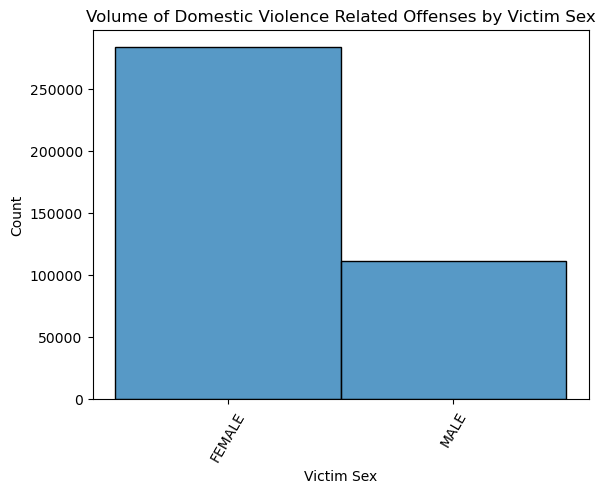

In [569]:
#Graph: Volume of Domestic Violence Related Offenses by Victim Sex

sns.histplot(binwidth=1,
            x="Victim Sex",
            data=df,
            stat="count",
            multiple="dodge").set_title("Volume of Domestic Violence Related Offenses by Victim Sex")
plt.xticks(rotation=60)

plt.show()

In [570]:
pt = df.pivot_table(index="Year", columns="Victim Sex", values="ID", aggfunc=lambda x:len(x.unique()))
display(pt)

Victim Sex,FEMALE,MALE
Year,,
2020,136676,54150
2021,146685,57474


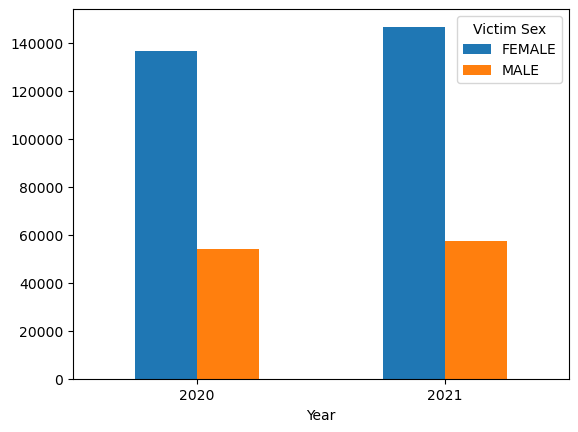

In [571]:
ax1=pt.plot(kind='bar', rot=0)

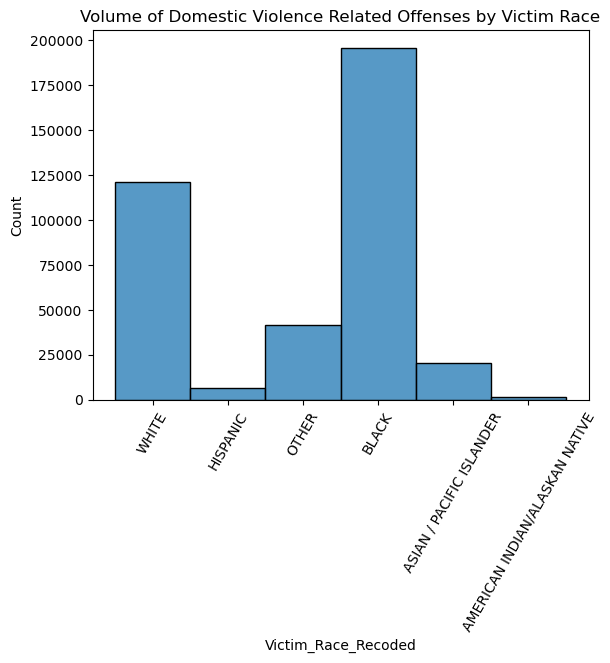

In [572]:
#Graph: Volume of Domestic Violence Related Offenses by Victim Race

sns.histplot(binwidth=1,
            x="Victim_Race_Recoded",
            data=df,
            stat="count",
            multiple="dodge").set_title("Volume of Domestic Violence Related Offenses by Victim Race")
plt.xticks(rotation=60)

plt.show()

In [573]:
pt2 = df.pivot_table(index="Year", columns="Victim_Race_Recoded", values="ID", aggfunc=lambda x:len(x.unique()))
display(pt2)

Victim_Race_Recoded,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,HISPANIC,OTHER,WHITE
Year,,,,,,
2020,809,9972,94182,3165,20216,58999
2021,900,10758,101654,3431,21541,62104


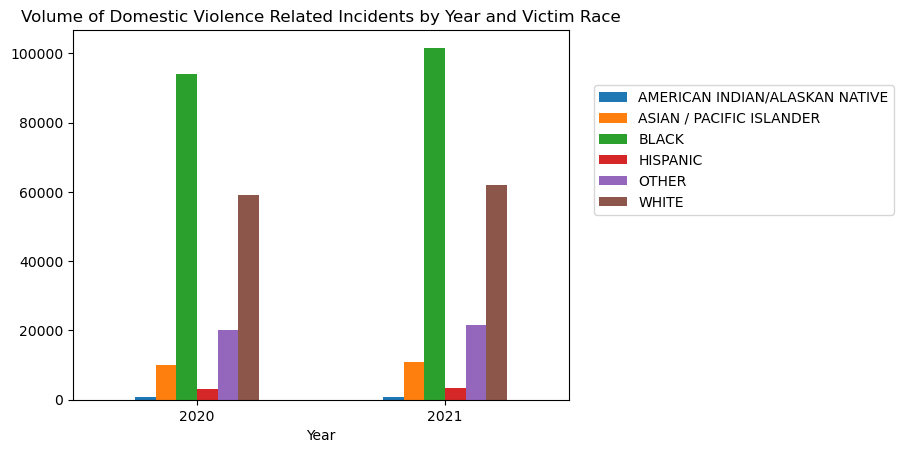

In [574]:
ax1=pt2.plot(kind='bar', rot=0)
plt.title("Volume of Domestic Violence Related Incidents by Year and Victim Race")
plt.legend(loc=(1.05,0.5))

In [575]:
#Poverty 

pt4 = df.pivot_table(index="Year", columns="Poverty", values="ID", aggfunc=lambda x:len(x.unique()))
display(pt4)

Poverty,1.0
Year,
2020,102006
2021,100317


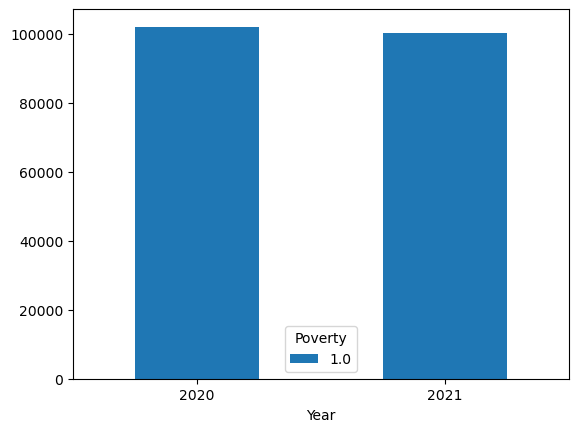

In [576]:
ax1=pt4.plot(kind='bar', rot=0)

In [577]:
#Borough by Year
pt6 = df.pivot_table(index="Year", columns="Borough Name", values="ID", aggfunc=lambda x:len(x.unique()))
display(pt6)

Borough Name,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
Year,,,,,
2020,73358,70661,35031,50910,12080
2021,70864,70537,37072,51120,12155


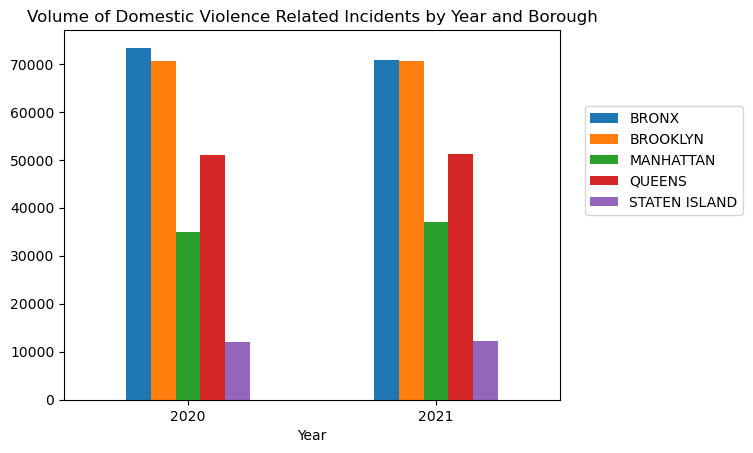

In [578]:
ax1=pt6.plot(kind='bar', rot=0)
plt.title("Volume of Domestic Violence Related Incidents by Year and Borough")
plt.legend(loc=(1.05,0.5))

In [579]:
#Additional Data Cleaning: Restricting File
year_to_remove = 2020
df.restrict1 = df[df['Report Date'].dt.year != year_to_remove]

C:\Users\katri\AppData\Local\Temp\ipykernel_21424\166558294.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.restrict1 = df[df['Report Date'].dt.year != year_to_remove]


In [580]:
print(df.restrict1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 241748 entries, 3 to 483785
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Offense Type                241748 non-null  object        
 1   Report Date                 241748 non-null  datetime64[ns]
 2   Borough Name                241748 non-null  object        
 3   Intimate Relationship Flag  241748 non-null  object        
 4   Victim_Race                 200388 non-null  object        
 5   Victim Sex                  204159 non-null  object        
 6   COMMDIST                    241672 non-null  float64       
 7   Poverty                     100317 non-null  float64       
 8   ID                          241748 non-null  int64         
 9   Year                        241748 non-null  int32         
 10  Month                       241748 non-null  int32         
 11  Victim_Race_Recoded         200388 non-null 

In [581]:
pt8 = df.restrict1.pivot_table(index="Year", columns="Borough Name", values="ID", aggfunc=lambda x:len(x.unique()))
display(pt8)

Borough Name,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
Year,,,,,
2021,70864,70537,37072,51120,12155


In [582]:
pt9 = df.restrict1.pivot_table(index="Borough Name", columns="Poverty", values="ID", aggfunc=lambda x:len(x.unique()))
display(pt9)

Poverty,1.0
Borough Name,
BRONX,53058
BROOKLYN,29009
MANHATTAN,18239
QUEENS,11


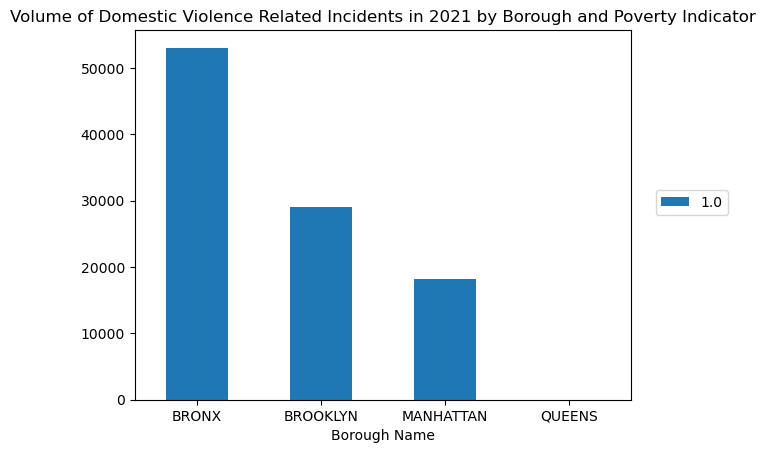

In [583]:
ax1=pt9.plot(kind='bar', rot=0)
plt.title("Volume of Domestic Violence Related Incidents in 2021 by Borough and Poverty Indicator")
plt.legend(loc=(1.05,0.5))

In [584]:
#Additional Data Cleaning: Restricting File
year_to_remove = 2021
df.restrict2 = df[df['Report Date'].dt.year != year_to_remove]

C:\Users\katri\AppData\Local\Temp\ipykernel_21424\3741662501.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.restrict2 = df[df['Report Date'].dt.year != year_to_remove]


In [585]:
print(df.restrict2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 242040 entries, 0 to 483789
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Offense Type                242040 non-null  object        
 1   Report Date                 242040 non-null  datetime64[ns]
 2   Borough Name                242040 non-null  object        
 3   Intimate Relationship Flag  242040 non-null  object        
 4   Victim_Race                 187343 non-null  object        
 5   Victim Sex                  190826 non-null  object        
 6   COMMDIST                    242012 non-null  float64       
 7   Poverty                     102006 non-null  float64       
 8   ID                          242040 non-null  int64         
 9   Year                        242040 non-null  int32         
 10  Month                       242040 non-null  int32         
 11  Victim_Race_Recoded         187343 non-null 

In [586]:
pt10 = df.restrict2.pivot_table(index="Borough Name", columns="Poverty", values="ID", aggfunc=lambda x:len(x.unique()))
display(pt10)

Poverty,1.0
Borough Name,
BRONX,54659
BROOKLYN,29203
MANHATTAN,18078
QUEENS,66


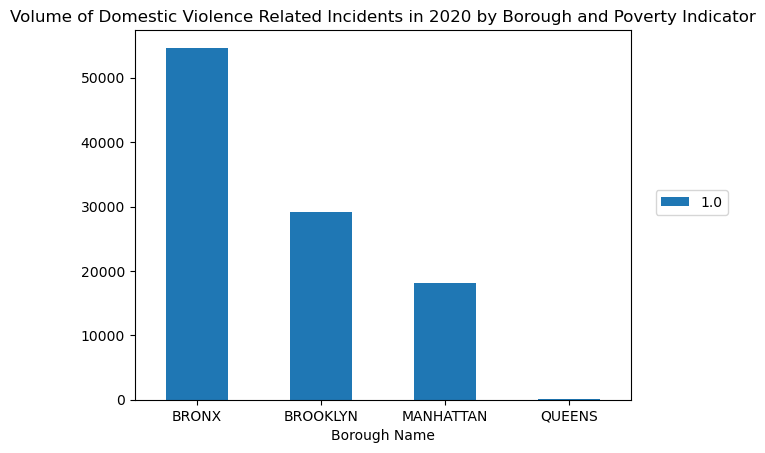

In [587]:
ax1=pt10.plot(kind='bar', rot=0)
plt.title("Volume of Domestic Violence Related Incidents in 2020 by Borough and Poverty Indicator")
plt.legend(loc=(1.05,0.5))

In [588]:
#Additional Data Cleaning: Restricting File: displaying 2021 data for BRONX only 
df.restrict1_Bronx=df.restrict1[df.restrict1["Borough Name"] == "BRONX"] 

C:\Users\katri\AppData\Local\Temp\ipykernel_21424\1641568575.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.restrict1_Bronx=df.restrict1[df.restrict1["Borough Name"] == "BRONX"]


In [589]:
print(df.restrict1_Bronx.info())

<class 'pandas.core.frame.DataFrame'>
Index: 70864 entries, 25 to 483781
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Offense Type                70864 non-null  object        
 1   Report Date                 70864 non-null  datetime64[ns]
 2   Borough Name                70864 non-null  object        
 3   Intimate Relationship Flag  70864 non-null  object        
 4   Victim_Race                 53759 non-null  object        
 5   Victim Sex                  55771 non-null  object        
 6   COMMDIST                    70838 non-null  float64       
 7   Poverty                     53058 non-null  float64       
 8   ID                          70864 non-null  int64         
 9   Year                        70864 non-null  int32         
 10  Month                       70864 non-null  int32         
 11  Victim_Race_Recoded         53759 non-null  object       

In [590]:
pt20 = df.restrict1_Bronx.pivot_table(index="Borough Name", columns="COMMDIST", values="ID", aggfunc=lambda x:len(x.unique()))
display(pt20)

COMMDIST,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,226.0,227.0,228.0
Borough Name,,,,,,,,,,,,,,,
BRONX,7312,4002,6967,7368,7169,5356,5924,2385,8960,3088,4034,8236,10,13,14


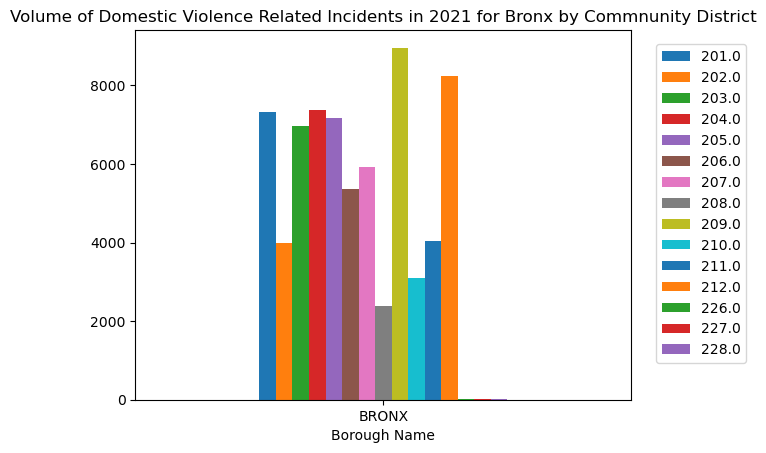

In [591]:
ax1=pt20.plot(kind='bar', rot=0)
plt.title("Volume of Domestic Violence Related Incidents in 2021 for Bronx by Commnunity District")
plt.legend(loc=(1.05,0.1))

In [592]:
#Additional Data Cleaning: Restricting File: displaying 2020 data for BRONX only 
df.restrict2_Bronx=df.restrict2[df.restrict2["Borough Name"] == "BRONX"] 

C:\Users\katri\AppData\Local\Temp\ipykernel_21424\1753171050.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.restrict2_Bronx=df.restrict2[df.restrict2["Borough Name"] == "BRONX"]


In [593]:
print(df.restrict2_Bronx.info())

<class 'pandas.core.frame.DataFrame'>
Index: 73358 entries, 15 to 483788
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Offense Type                73358 non-null  object        
 1   Report Date                 73358 non-null  datetime64[ns]
 2   Borough Name                73358 non-null  object        
 3   Intimate Relationship Flag  73358 non-null  object        
 4   Victim_Race                 50069 non-null  object        
 5   Victim Sex                  51881 non-null  object        
 6   COMMDIST                    73341 non-null  float64       
 7   Poverty                     54659 non-null  float64       
 8   ID                          73358 non-null  int64         
 9   Year                        73358 non-null  int32         
 10  Month                       73358 non-null  int32         
 11  Victim_Race_Recoded         50069 non-null  object       

In [594]:
pt21 = df.restrict1_Bronx.pivot_table(index="Borough Name", columns="COMMDIST", values="ID", aggfunc=lambda x:len(x.unique()))
display(pt21)

COMMDIST,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,226.0,227.0,228.0
Borough Name,,,,,,,,,,,,,,,
BRONX,7312,4002,6967,7368,7169,5356,5924,2385,8960,3088,4034,8236,10,13,14


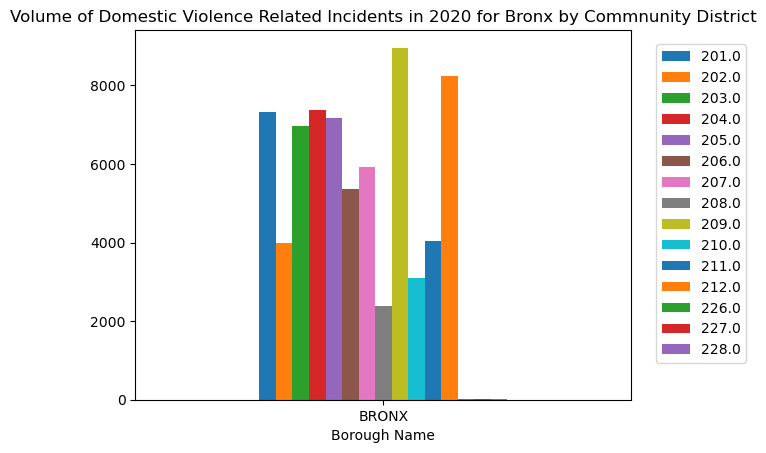

In [595]:
ax1=pt21.plot(kind='bar', rot=0)
plt.title("Volume of Domestic Violence Related Incidents in 2020 for Bronx by Commnunity District")
plt.legend(loc=(1.05,0.1))

In [596]:
#Additional Data Cleaning: Restricting File: displaying 2021 data for Brooklyn only 
df.restrict1_Brooklyn=df.restrict1[df.restrict1["Borough Name"] == "BROOKLYN"] 

C:\Users\katri\AppData\Local\Temp\ipykernel_21424\4135018629.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.restrict1_Brooklyn=df.restrict1[df.restrict1["Borough Name"] == "BROOKLYN"]


In [597]:
pt22 = df.restrict1_Brooklyn.pivot_table(index="Borough Name", columns="COMMDIST", values="ID", aggfunc=lambda x:len(x.unique()))
display(pt22)

COMMDIST,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,...,313.0,314.0,315.0,316.0,317.0,318.0,355.0,356.0,405.0,410.0
Borough Name,,,,,,,,,,,,,,,,,,,,,
BROOKLYN,3505,2786,6728,3527,9794,1962,1774,3549,3007,1574,...,3444,3665,2353,7254,5831,5797,20,3,1,1


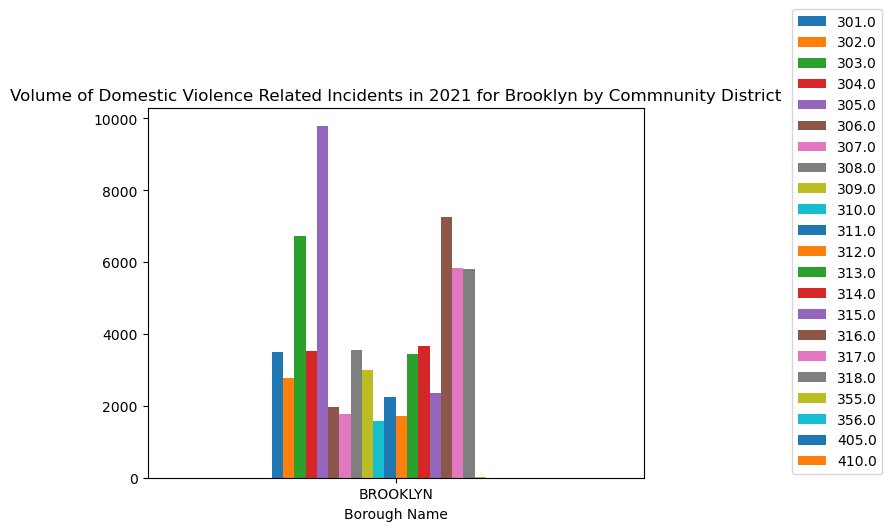

In [598]:
ax1=pt22.plot(kind='bar', rot=0)
plt.title("Volume of Domestic Violence Related Incidents in 2021 for Brooklyn by Commnunity District")
plt.legend(loc=(1.30,0.01))

In [599]:
#Additional Data Cleaning: Restricting File: displaying 2021 data for Brooklyn only 
df.restrict2_Brooklyn=df.restrict2[df.restrict2["Borough Name"] == "BROOKLYN"] 

C:\Users\katri\AppData\Local\Temp\ipykernel_21424\3658161314.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.restrict2_Brooklyn=df.restrict2[df.restrict2["Borough Name"] == "BROOKLYN"]


In [600]:
pt23 = df.restrict2_Brooklyn.pivot_table(index="Borough Name", columns="COMMDIST", values="ID", aggfunc=lambda x:len(x.unique()))
display(pt23)

COMMDIST,103.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,...,312.0,313.0,314.0,315.0,316.0,317.0,318.0,355.0,356.0,405.0
Borough Name,,,,,,,,,,,,,,,,,,,,,
BROOKLYN,4,3514,2749,6828,3469,9854,2129,2003,3662,2661,...,1536,3372,3604,2478,7512,5510,5747,24,5,2


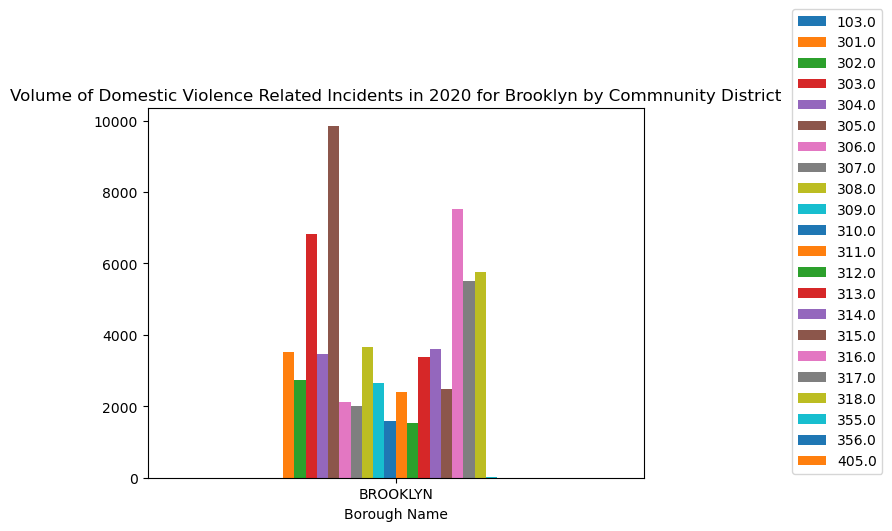

In [601]:
ax1=pt23.plot(kind='bar', rot=0)
plt.title("Volume of Domestic Violence Related Incidents in 2020 for Brooklyn by Commnunity District")
plt.legend(loc=(1.30,0.01))

In [602]:
#Results: The highest number of domestic violence related incidents occurred in the Bronx followed by Brooklyn, in both 2020 and 2021. Within the Bronx, community districts 209, 212 and 204 had the highest number of incidents while in Brooklyn, they were districts 305, 316 and 303. The Bronx and Brooklyn had the largest number of community districts with a high poverty rate.There were more female victims of domestic violence related incidents than males. Among victims who reported their race, those who identified as Black experienced the highest number of domestic violence related incidents followed by those who identified as White.